# **Linear Regression - SKLearn Diabetes Dataset**

In [1]:
%matplotlib inline
import pandas as pd   
import numpy as np    
import sklearn        
import seaborn as sns  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

So we know the that the target/response/dependent varialble to be predicted is a continuous numerical value which is a measure of disease progression after one year.

The features/independent variables we have are the 10 attributes from Age to serum measurement samples

In [4]:
diabetes.feature_names    

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.data.shape   

(442, 10)

In [6]:
diabetes.target.shape

(442,)

In [7]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

We created a pandas dataframe using the dataset.

In [8]:
db_df.sample(5)    #checking a sample of the dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
82,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.017162,0.100183,-0.039493,-0.070209,-0.079778
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.089630,-0.104340,0.052322,-0.076395,-0.056153,-0.067351
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362
180,-0.038207,0.050680,0.004572,0.035644,-0.011201,0.005889,-0.047082,0.034309,0.016307,-0.001078
75,-0.009147,0.050680,-0.030996,-0.026328,-0.011201,-0.001001,-0.021311,-0.002592,0.006207,0.027917


Note: As per dataset documentation: **"Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)"**. That is the reason we see that the variables to have seemingly odd values,they are centered to bring them to a common scale.

**Add Dependent Variable to the dataset**

In [9]:
db_df['Progression'] = diabetes.target #new column name 'Progression'

In [10]:
db_df.sample(2) #checking the dataset once again.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
414,0.081666,0.050680,0.006728,-0.004534,0.109883,0.117056,-0.032356,0.091875,0.054720,0.007207,131.0
344,-0.107226,-0.044642,-0.011595,-0.040099,0.049341,0.064447,-0.013948,0.034309,0.007027,-0.030072,200.0


In [11]:
db_df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

There are no missing values in the dataframe

In [12]:
db_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
db_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**Let us check the Linear correlation between the variables in the dataframe**

In [14]:
corr = db_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


**Let us visualize the correlation matrix for better understanding**

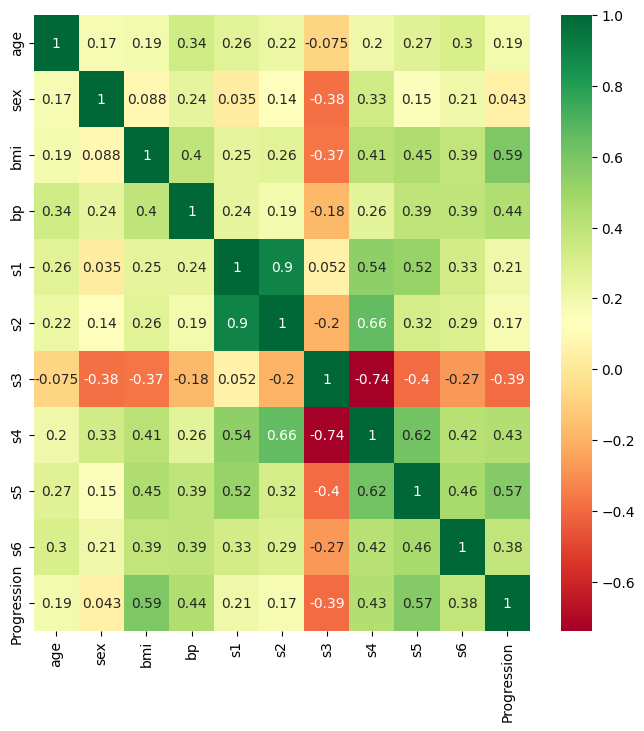

In [15]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

This plot shows the linear correlation between the variables within themselves & also variables with the target 'Progression'. This could be a phase where the variables which are multicollinear can be eliminated. Since this example will serve as an example of methodology followed in builiding a model, we are not going for feature selection (which will be an article in itself).

# MODELLING

**1) Create Features & Target**

In [16]:
X = db_df.drop(labels='Progression', axis=1) 
y = db_df['Progression']

**2) Train test split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


**3) Create instance of a model**

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

**4) Fit the model**

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

**5) Predict the progression of diabetes based on test data**

In [20]:
y_predicted = lm.predict(X_test)

In [21]:
y_predicted

array([137.94908878, 182.533354  , 129.85295373, 292.5630923 ,
       124.86788221,  89.73883143, 255.95872903, 177.64545905,
        87.8884795 , 107.93961905,  93.26357149, 171.11939483,
        56.06305218, 207.22146277,  99.78918734, 131.7128101 ,
       215.86378125, 252.18591603, 201.56577486, 220.38870357,
       204.35745939,  88.9068622 ,  68.52958146, 190.02378425,
       153.91270751, 164.02719031, 192.83227597, 187.16765226,
        46.60570802, 109.3112624 , 175.04965912,  87.8076198 ,
       130.37646375, 186.56325253, 172.4733248 , 188.61448165,
       124.07175323, 119.16132637, 147.74400127,  59.27254049,
        70.90046253, 109.30036497, 170.97191153, 156.56943489,
       168.68664924,  61.5457612 ,  71.19039454, 111.94779801,
        54.32009551, 165.81267886, 152.78043565,  63.80587155,
       110.07651605, 108.64317139, 179.16381014, 156.79651896,
        93.29011121, 212.91986757, 119.28417849,  70.70890653,
       186.678156  , 205.65720098, 140.02890626, 106.54

In [22]:
y_concat = np.vstack((y_test, y_predicted))
y_concat

array([[219.        ,  70.        , 202.        , 230.        ,
        111.        ,  84.        , 242.        , 272.        ,
         94.        ,  96.        ,  94.        , 252.        ,
         99.        , 297.        , 135.        ,  67.        ,
        295.        , 264.        , 170.        , 275.        ,
        310.        ,  64.        , 128.        , 232.        ,
        129.        , 118.        , 263.        ,  77.        ,
         48.        , 107.        , 140.        , 113.        ,
         90.        , 164.        , 180.        , 233.        ,
         42.        ,  84.        , 172.        ,  63.        ,
         48.        , 108.        , 156.        , 168.        ,
         90.        ,  52.        , 200.        ,  87.        ,
         90.        , 258.        , 136.        , 158.        ,
         69.        ,  72.        , 171.        ,  95.        ,
         72.        , 151.        , 168.        ,  60.        ,
        122.        ,  52.        , 187.

In [23]:
y_concatenated = {'actual': y_test, 
                  'predicted': y_predicted}
pd.DataFrame(y_concatenated)

,actual,predicted
287,219.0,137.949089
211,70.0,182.533354
72,202.0,129.852954
321,230.0,292.563092
73,111.0,124.867882
...,...,...
45,53.0,131.610575
153,71.0,128.295451
239,262.0,166.000770
380,52.0,185.587464


**6) Evaluate the Model**

In [24]:
from sklearn import metrics as mt
import math

In [25]:
mae_numpy = (y_predicted - y_test).abs().mean()
mae_sklearn = mt.mean_absolute_error(y_test, y_predicted)

print("Mean Absolute Error")
print('mae_numpy   = ', mae_numpy)
print('mae_sklearn = ', mae_sklearn)

Mean Absolute Error
mae_numpy   =  41.548506859880604
mae_sklearn =  41.548506859880604


In [26]:
mse_numpy = np.square((y_predicted - y_test)).mean()
mse_sklearn = mt.mean_squared_error(y_test, y_predicted)

print("Mean Squared Error")
print('mse_numpy   = ', mse_numpy)
print('mse_sklearn = ', mse_sklearn)

Mean Squared Error
mse_numpy   =  2848.3106508475053
mse_sklearn =  2848.3106508475053


In [27]:
rmse_numpy = math.sqrt(np.square((y_predicted - y_test)).mean())
rmse_sklearn = math.sqrt(mt.mean_squared_error(y_test, y_predicted))

print("Root Mean Squared Error")
print('rmse_numpy   = ', rmse_numpy)
print('rmse_sklearn = ', rmse_sklearn)

Root Mean Squared Error
rmse_numpy   =  53.369566710321955
rmse_sklearn =  53.369566710321955


In [28]:
mape_numpy = ((y_predicted - y_test).abs() / y_test).mean() 
mape_sklearn = mt.mean_absolute_percentage_error(y_test, y_predicted)

print("Mean Absolute Percentage Error")
print('mape_numpy   = ', mape_numpy)
print('mape_sklearn = ', mape_sklearn)

Mean Absolute Percentage Error
mape_numpy   =  0.37310970433744683
mape_sklearn =  0.37310970433744683


In [29]:
r_squared_numpy = 1 - (np.sum((y_test - y_predicted) ** 2) \
                    / np.sum((y_test - np.mean(y_test)) ** 2))
r_squared_sklearn = mt.r2_score(y_test, y_predicted)

print("R Squared")
print('r_squared_numpy   = ', r_squared_numpy)
print('r_squared_sklearn = ', r_squared_sklearn)

R Squared
r_squared_numpy   =  0.4849058889476756
r_squared_sklearn =  0.4849058889476756


In [30]:
print("1) The Mean Squared Error of model is ", 
      mt.mean_squared_error(y_test, y_predicted), 
      "\nhence the Root Mean Squared Error (RMSE) of model is ",
      math.sqrt(mt.mean_squared_error(y_test, y_predicted)))

print("2) The Mean Absolute Error of model is ", 
      mt.mean_absolute_error(y_test, y_predicted))

print("3) The Mean Absolute Percentage Error of model is ", 
      mt.mean_absolute_percentage_error(y_test, y_predicted))

print("4) The R-Square score of the model is ",
      mt.r2_score(y_test, y_predicted))

1) The Mean Squared Error of model is  2848.3106508475053 
hence the Root Mean Squared Error (RMSE) of model is  53.369566710321955
2) The Mean Absolute Error of model is  41.548506859880604
3) The Mean Absolute Percentage Error of model is  0.37310970433744683
4) The R-Square score of the model is  0.4849058889476756


In [31]:
coeff = pd.Series(lm.coef_, index = X_train.columns)
intercept = lm.intercept_

In [32]:
print("Coefficients:")
print(coeff)
print("")
print("Intercept:")
print(intercept)

Coefficients:
age     47.749681
sex   -241.990907
bmi    531.971063
bp     381.562862
s1    -918.502905
s2     508.257783
s3     116.950164
s4     269.492303
s5     695.808117
s6      26.324582
dtype: float64

Intercept:
151.6651755919933



## Let us use another package called Statsmodel & build another model. Statsmodel
## package gives a better summary of the model parameters w.r.t Linear Regression

In [33]:
import statsmodels.api as sm

In [34]:
lm2 = sm.OLS.from_formula("Progression ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", 
                          data=db_df)
trained_lm2 = lm2.fit()

In [35]:
predictions = trained_lm2.predict(X)

In [36]:
summary_model = trained_lm2.summary()
print(summary_model)

                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.83e-62
Time:                        19:33:03   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0